# Create Distance Infographic - Cosmic Explorer Trade Study 

This Notebook reads from the output of Bayesian inference runs and creates a distance infographic for measuring the parameters of a CBC signal to within 10% accuracy.

### Import modules

In [1]:
import numpy
import matplotlib.pyplot as plt
import json
from matplotlib.patches import Patch
import seaborn as sns
from glob import glob
import collections
import math

# plt.style.use('dark_background')
%matplotlib inline


In [2]:
sns.color_palette("hls", 8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [3]:
sns.color_palette("muted")

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [4]:
# sns.palplot(sns.light_palette("orange", 4))
# palette = sns.color_palette("Blues_r", 4)
palette = sns.color_palette("hls", 8)
# define a dictionary to standardize the colors for different parameters
color_dict = {'CE-40':palette[4], 'CE-20':palette[5], 
              'Voyager':palette[6],
              'CE-40 + CE-20':palette[2], 'LVK':palette[0], 'aLIGO':palette[0]}

label_dict = {"NS-radius": r"Constrain NS radius to within 10 m",
              "sky-loc": r"Locate 100 sources to within 1 sq. deg.",
              "early-detection": r"Detect 10 sources 60 seconds before merger",
              "H0": r"Measure $H_0$ to within $1\%$",
              "Omega": r"Measure $\Omega_m$ to within $1\%$",
              "GR": r"Measure GR to a precision of $10^{-10}$",
              "BH-mass-spectrum": r"Measure BH mass spectrum",
              "NS-mass-spectrum": r"Measure NS mass spectrum",
             }

In [5]:
def plot_dist_bar(network_dict, nw_number):
    '''
    Evaluates the x-ranges for the broken bar for
    each parameter from the dictionary values. Plots 
    the broken bars for each parameter.
    
    Parameters
    ----------
    network_dict: dictionary
        Dictionary with the disctance values
    
    nw_number: int
        Number id for the detctor network
    '''
    
    sorted_dict = {x: network_dict[x] for x in network_dict if x not in ["Name"]}
    sorted_dict = collections.OrderedDict(sorted(sorted_dict.items(), key=lambda x: x[1], reverse=True))
    if network_dict["Name"]=="sky-loc":
        for key in sorted_dict.keys():
            if sorted_dict[key]!= 0:
                p = ax.barh(10*nw_number, sorted_dict[key], left=0, height = 5, 
                            color=color_dict[key], alpha = 1)
    else:    
        for key in sorted_dict.keys():
            if sorted_dict[key]!= 0:
                p = ax.barh(10*nw_number, sorted_dict[key], left=0, height = 5, 
                            color=color_dict[key], alpha = 1)
    

#     p = ax.barh(10*nw_number, network_dict['LVK'], left=0, height = 5, 
#                 color=color_dict['LVK'], alpha = 1, label=str(int(network_dict['LVK']))) 

#     p = ax.barh(10*nw_number, network_dict['CE-20'], left=0, height = 5, 
#                 color=color_dict['CE-20'], alpha = 1, label=str(int(network_dict['CE-20'])))
    
#     p = ax.barh(10*nw_number, network_dict['CE-40'], left=0, height = 5, 
#                 color=color_dict['CE-40'], alpha = 1., label=str(int(network_dict['CE-40'])))


#     p = ax.barh(10*nw_number, network_dict['CE-40 + CE-20'], left=0, height = 5, 
#                 color=color_dict['CE-40 + CE-20'], alpha = 1, label=str(int(network_dict['CE-40 + CE-20']))) 
  

### Plotting the timelines

plotting times for NS-mass-spectrum
plotting times for BH-mass-spectrum
plotting times for GR
plotting times for Omega
plotting times for H0
plotting times for early-detection
plotting times for sky-loc
plotting times for NS-radius


/usr1/chaitanya.afle/ipykernel_1935458/2774228508.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-1, 310.)


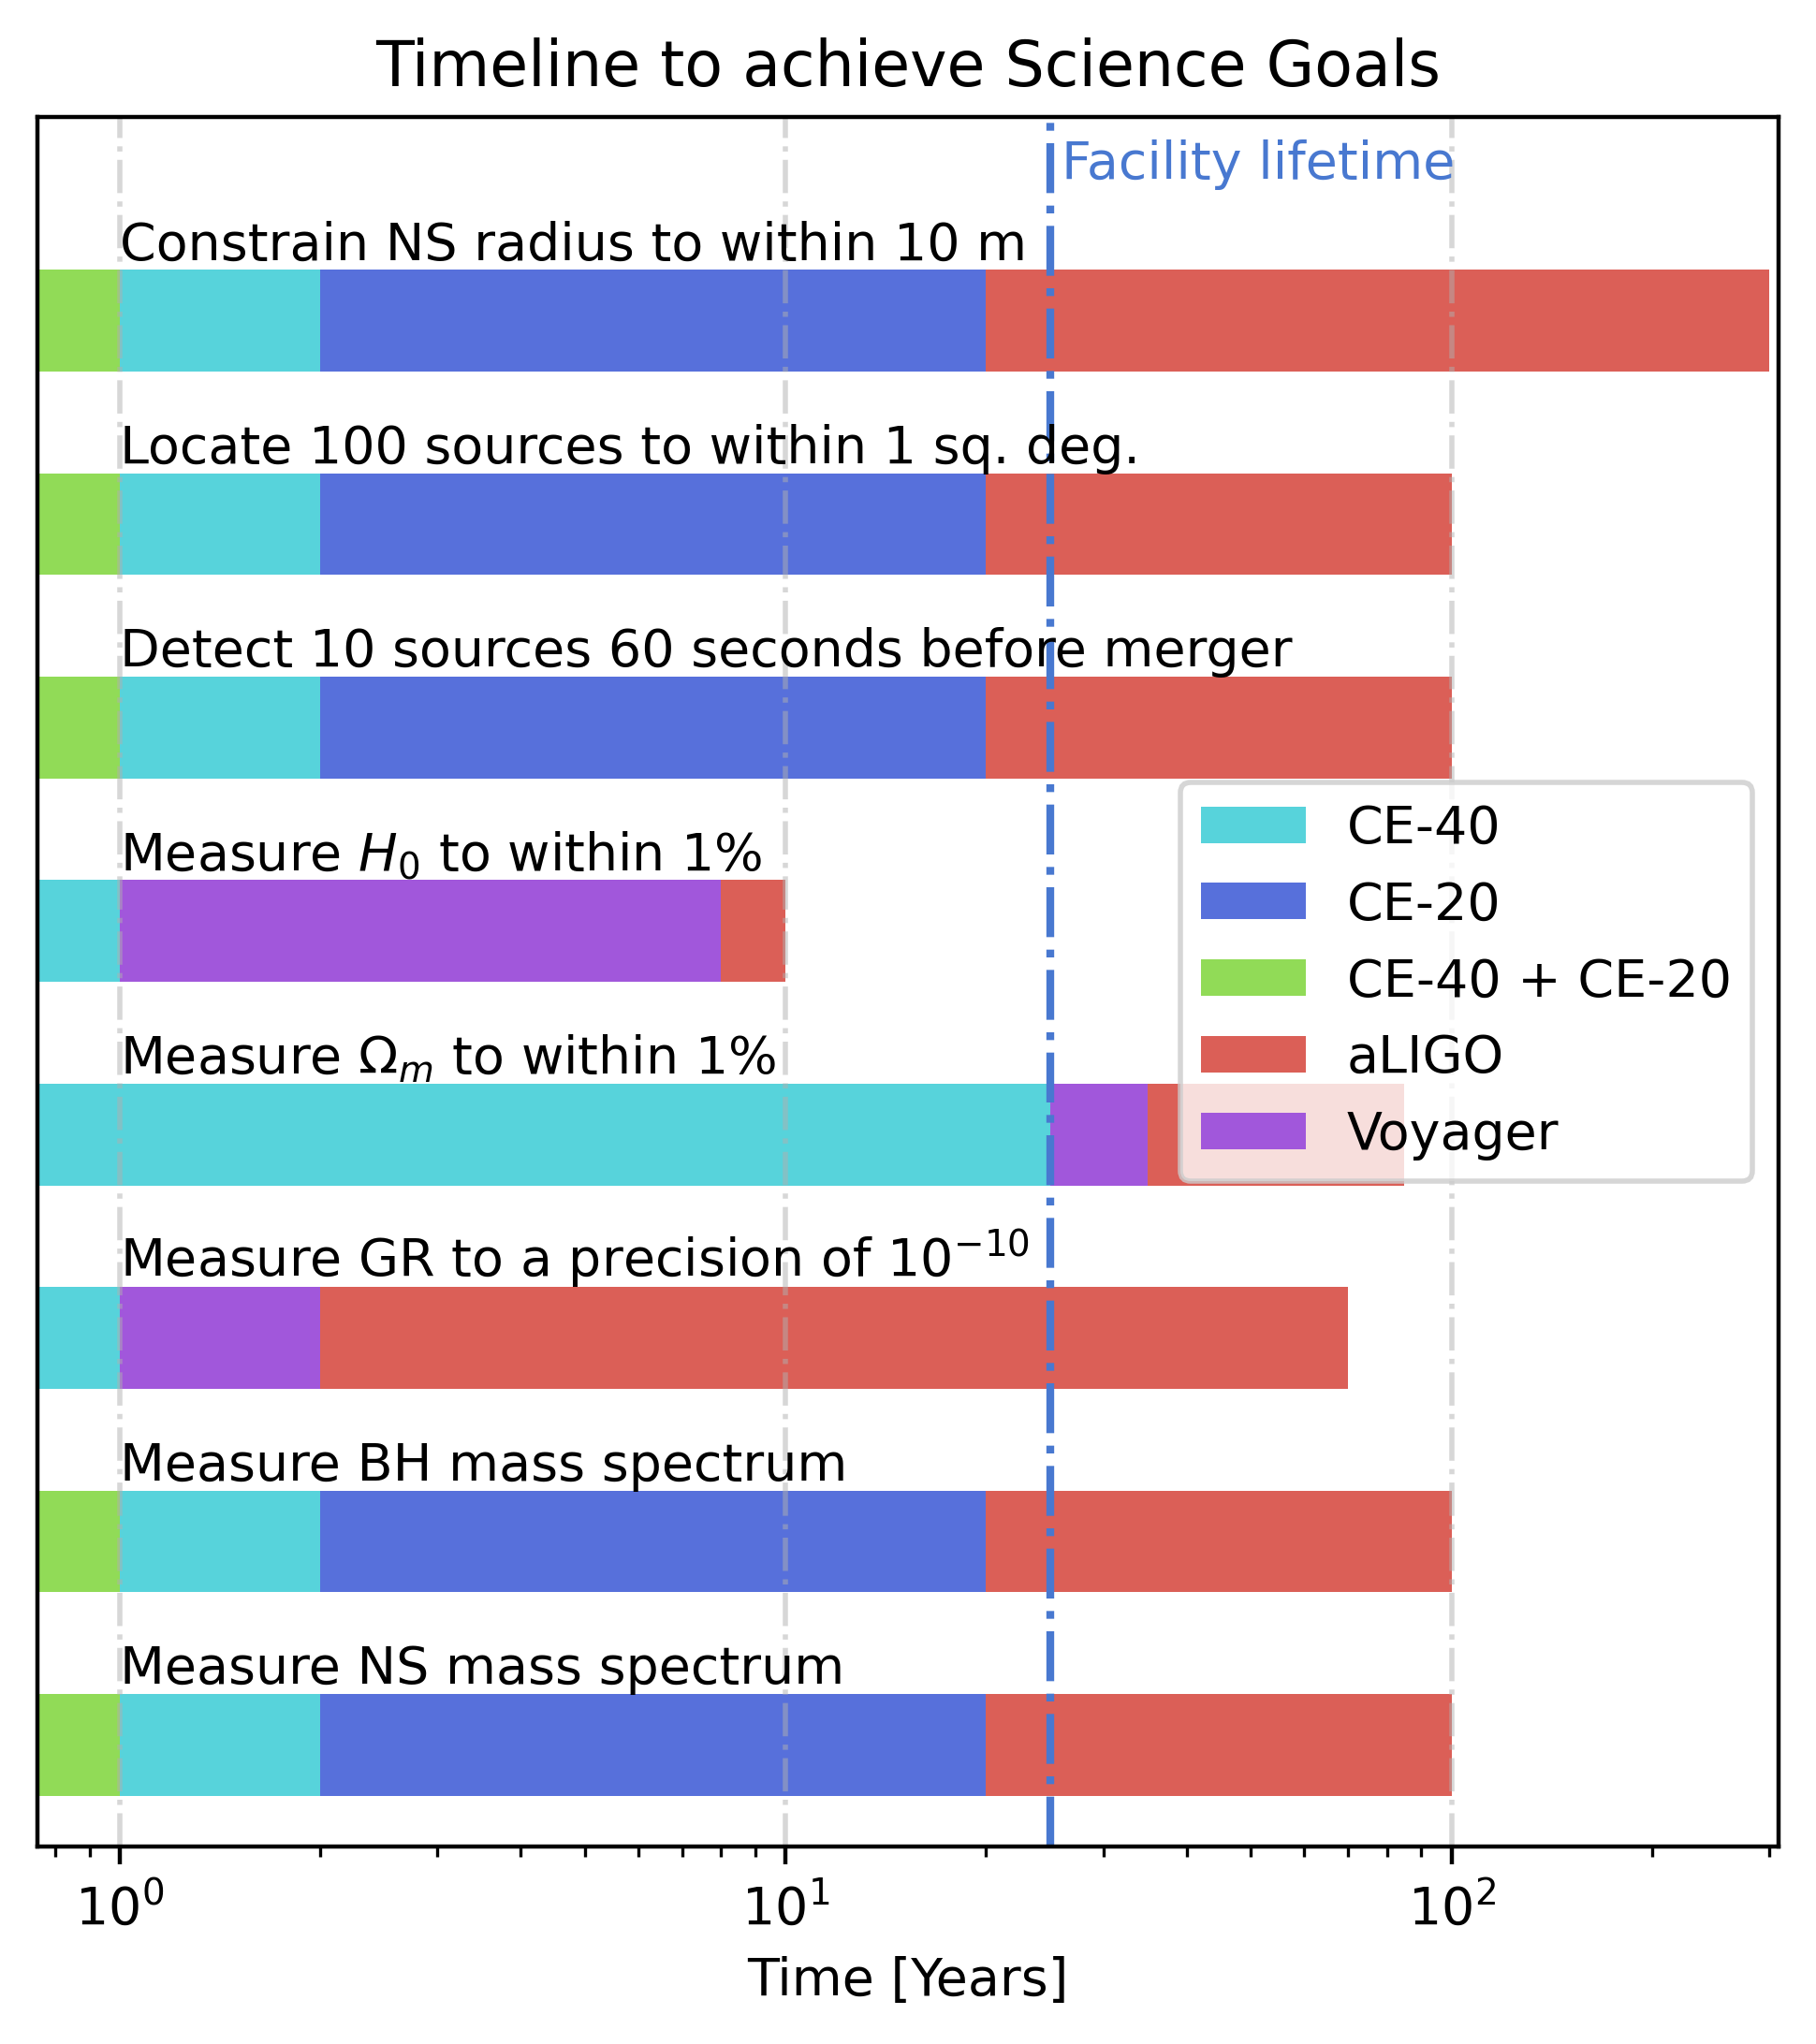

In [6]:
# list of all the network files
network_list = sorted(glob("timeline_plot_data/timeline_plot_data.txt"), reverse=True)

# example contents of a file:
# {"Name": "Time to constrain NS radius to within 10", "CE-40": 2, "CE-20": 20, "CE-40 + CE-20": 1, "LVK": 100}

# initiate a list of names for the detector networks
name_list = []

fig, ax = plt.subplots(figsize=[6, 6], dpi=400)

with open(network_list[0], 'r') as handle:
    json_data = [json.loads(line) for line in handle]
    
for ii in range(len(json_data)):
#     print(json_data[-ii])
    nw_dict = json_data[-ii-1]
    name = nw_dict['Name']
    print('plotting times for {}'.format(name))
    name_list.append(name)
    plot_dist_bar(nw_dict, ii+1)
    plt.text(1, 3+(10*(ii+1)), label_dict[name])

ax.set_ylim(5, len(json_data)*10+10)

ax.set_xlabel('Time [Years]')
ax.set_yticks([])
# ax.set_yticks([(ii*10 +10) for ii in range(len(json_data))], 
#               labels=name_list)     # Modify y-axis tick labels
# ax.grid(True)                                       

# create legend
legend_elements = [Patch(facecolor=color_dict['CE-40'], 
                         label='CE-40'),
                   Patch(facecolor=color_dict['CE-20'], 
                         label='CE-20'),
                   Patch(facecolor=color_dict['CE-40 + CE-20'], 
                         label='CE-40 + CE-20'),
                   Patch(facecolor=color_dict['aLIGO'], 
                         label='aLIGO'),
                   Patch(facecolor=color_dict['Voyager'], 
                         label='Voyager')]
ax.legend(handles=legend_elements, loc='center right')
plt.xscale('log')
ax.set_xlim(-1, 310.)

# Facility time vertical line
fc = sns.color_palette("muted")[0]
plt.axvline(25, linestyle="-.", c=fc)
plt.text(26, 87, "Facility lifetime" , c=fc)

plt.grid(which='major', axis='x', linestyle='-.', linewidth=1, alpha=0.5)
plt.title('Timeline to achieve Science Goals')
plt.savefig('time-infographic.png')
plt.show()